In [34]:
import pandas as pd

file_path = r"C:\Users\Hites\OneDrive\Desktop\CDAC 2024\Project\Sample\Sample_Final_Data.csv"
df = pd.read_csv(file_path)

print(df.head())


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,Delayed
0,2018-03-24,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855.0,0.0,-5.0,...,6.0,1901.0,1920.0,7.0,1935,-8.0,0.0,-1.0,1,0
1,2018-04-23,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111.0,16.0,16.0,...,22.0,2133.0,2253.0,23.0,2249,27.0,1.0,1.0,2,1
2,2018-02-16,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728.0,38.0,38.0,...,16.0,1744.0,1859.0,4.0,1820,43.0,1.0,2.0,3,1
3,2018-12-07,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851.0,6.0,6.0,...,9.0,1900.0,2207.0,7.0,2215,-1.0,0.0,-1.0,4,0
4,2018-06-03,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201.0,1.0,1.0,...,7.0,1208.0,1637.0,2.0,1655,-16.0,0.0,-2.0,6,0


In [35]:
# Check the data types of the columns in the DataFrame
print(df.dtypes)

FlightDate               object
Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
CRSDepTime                int64
DepTime                 float64
DepDelayMinutes         float64
DepDelay                float64
ArrTime                 float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
Operating_Airline        object
OriginAirportID           int64
OriginCityName           object
OriginStateName          object
DestAirportID             int64
DestCityName             object
DestState                object
DestStateName            object
DepDel15                float64
DepartureDelayGroups    float64
TaxiOut 

In [8]:
# Convert FlightDate to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [9]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))

                          FlightDate    CRSDepTime       DepTime  \
count                          48417  48417.000000  48417.000000   
mean   2020-06-19 16:58:10.476485632   1325.437966   1329.203441   
min              2018-01-01 00:00:00      1.000000      1.000000   
25%              2019-04-02 00:00:00    915.000000    917.000000   
50%              2020-06-14 00:00:00   1320.000000   1325.000000   
75%              2021-10-10 00:00:00   1730.000000   1738.000000   
max              2022-07-31 00:00:00   2359.000000   2400.000000   
std                              NaN    483.369534    495.888253   

       DepDelayMinutes      DepDelay       ArrTime  ArrDelayMinutes  \
count     48417.000000  48417.000000  48417.000000     48417.000000   
mean         12.477931      8.971085   1467.702212        12.602144   
min           0.000000    -58.000000      1.000000         0.000000   
25%           0.000000     -6.000000   1054.000000         0.000000   
50%           0.000000     -3.00

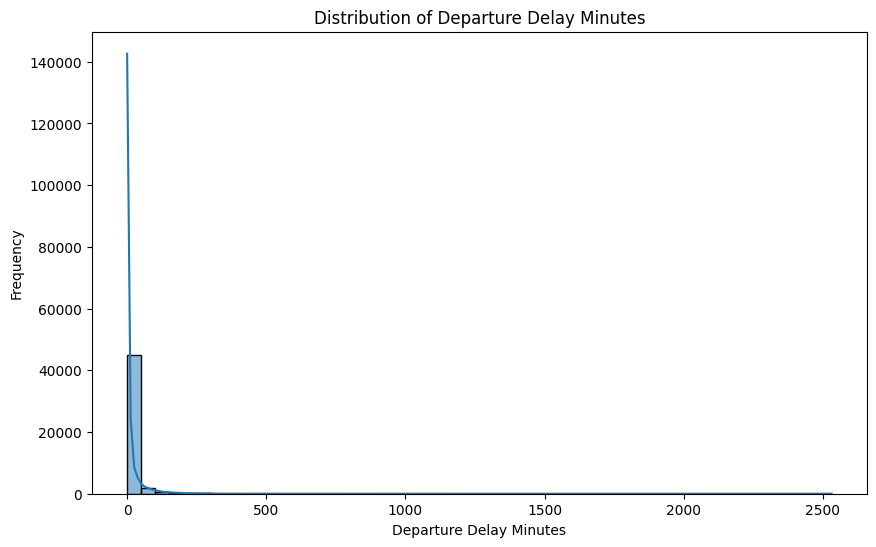

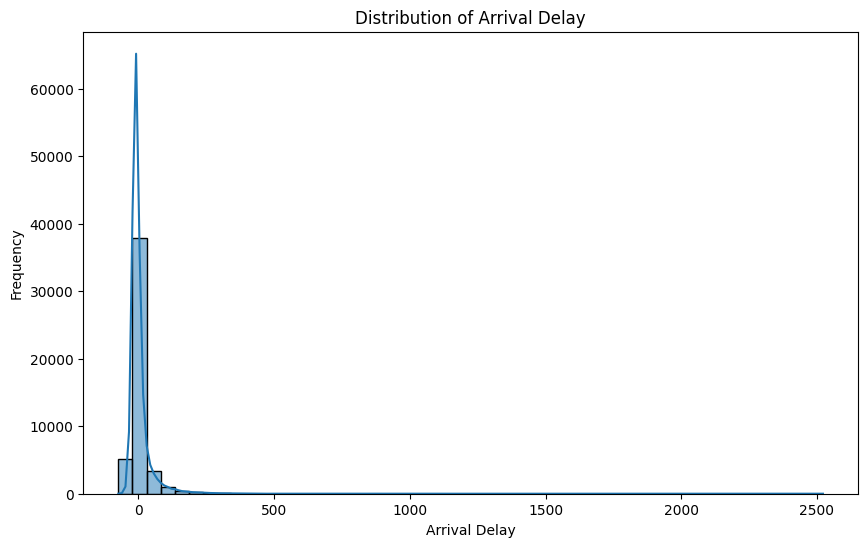

In [10]:
# Distribution of DepDelay
plt.figure(figsize=(10, 6))
sns.histplot(df['DepDelayMinutes'], bins=50, kde=True)
plt.title('Distribution of Departure Delay Minutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')
plt.show()

# Distribution of ArrDelay
plt.figure(figsize=(10, 6))
sns.histplot(df['ArrDelay'], bins=50, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.show()

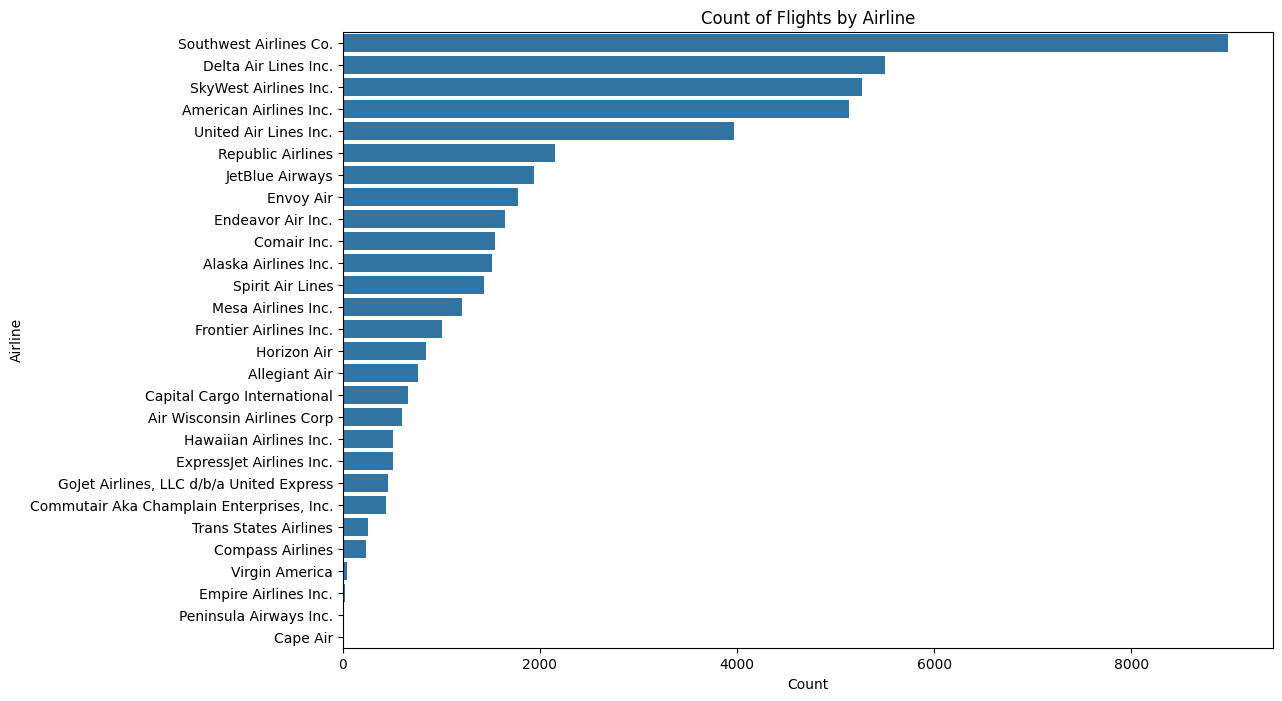

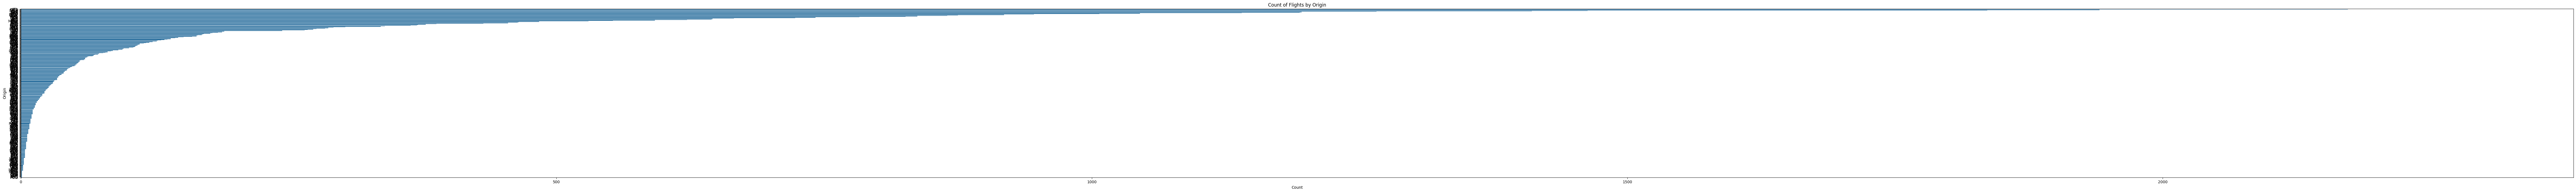

In [13]:
# Count plot of Airline
plt.figure(figsize=(12, 8))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title('Count of Flights by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

# Count plot of Origin
plt.figure(figsize=(120, 8))
sns.countplot(y='Origin', data=df, order=df['Origin'].value_counts().index)
plt.title('Count of Flights by Origin')
plt.xlabel('Count')
plt.ylabel('Origin')
plt.show()

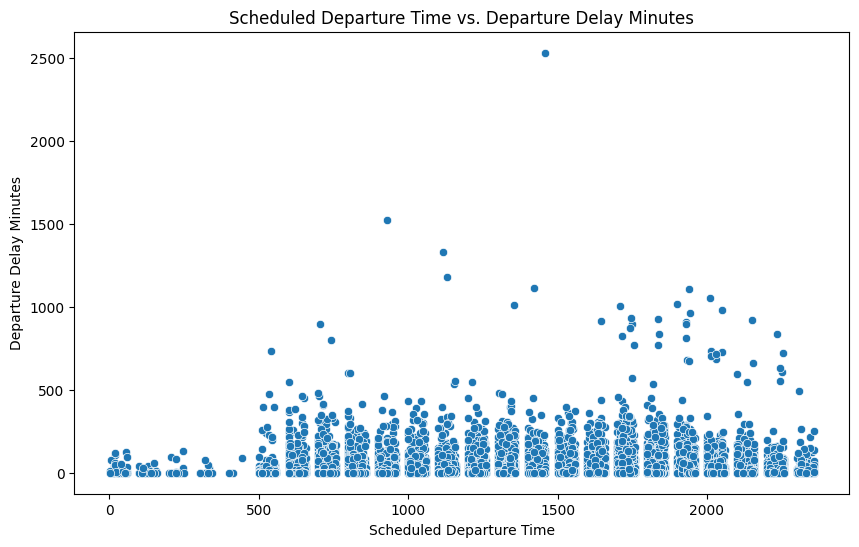

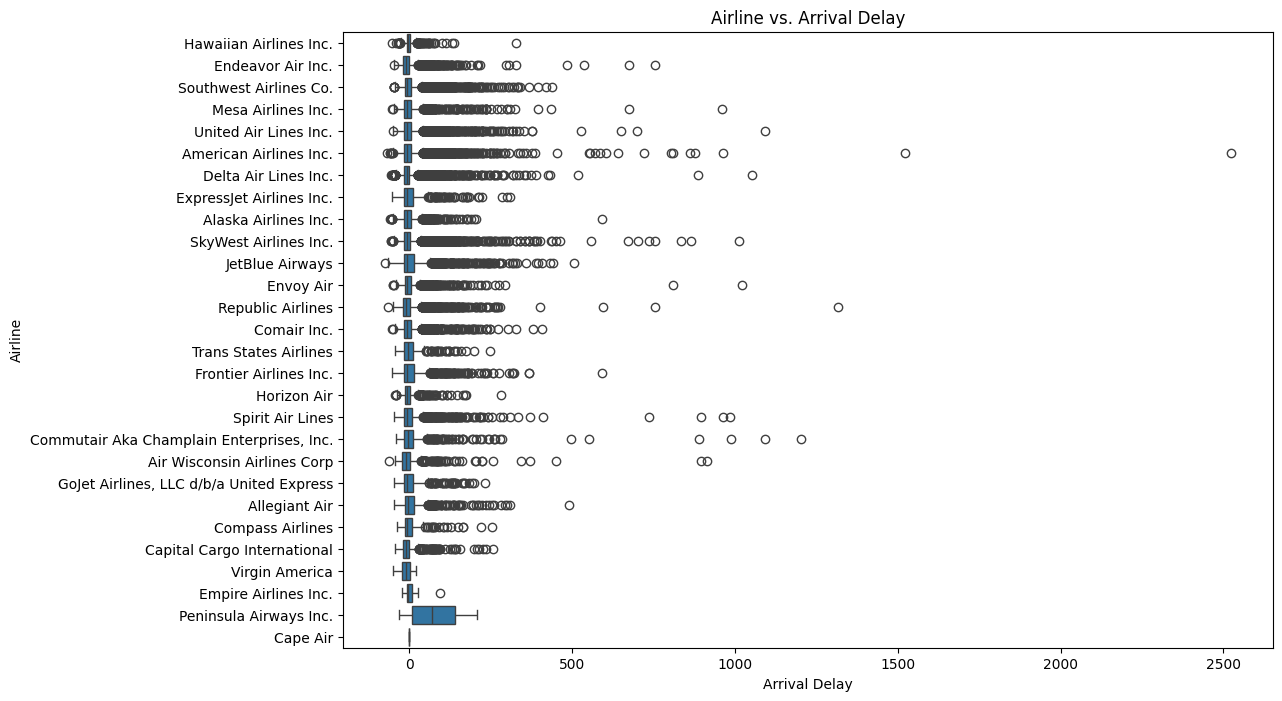

In [14]:
# Scatter plot of CRSDepTime vs. DepDelayMinutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRSDepTime', y='DepDelayMinutes', data=df)
plt.title('Scheduled Departure Time vs. Departure Delay Minutes')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Departure Delay Minutes')
plt.show()

# Box plot of Airline vs. ArrDelay
plt.figure(figsize=(12, 8))
sns.boxplot(x='ArrDelay', y='Airline', data=df)
plt.title('Airline vs. Arrival Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Airline')
plt.show()

In [15]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Hawaiian Airlines Inc.'

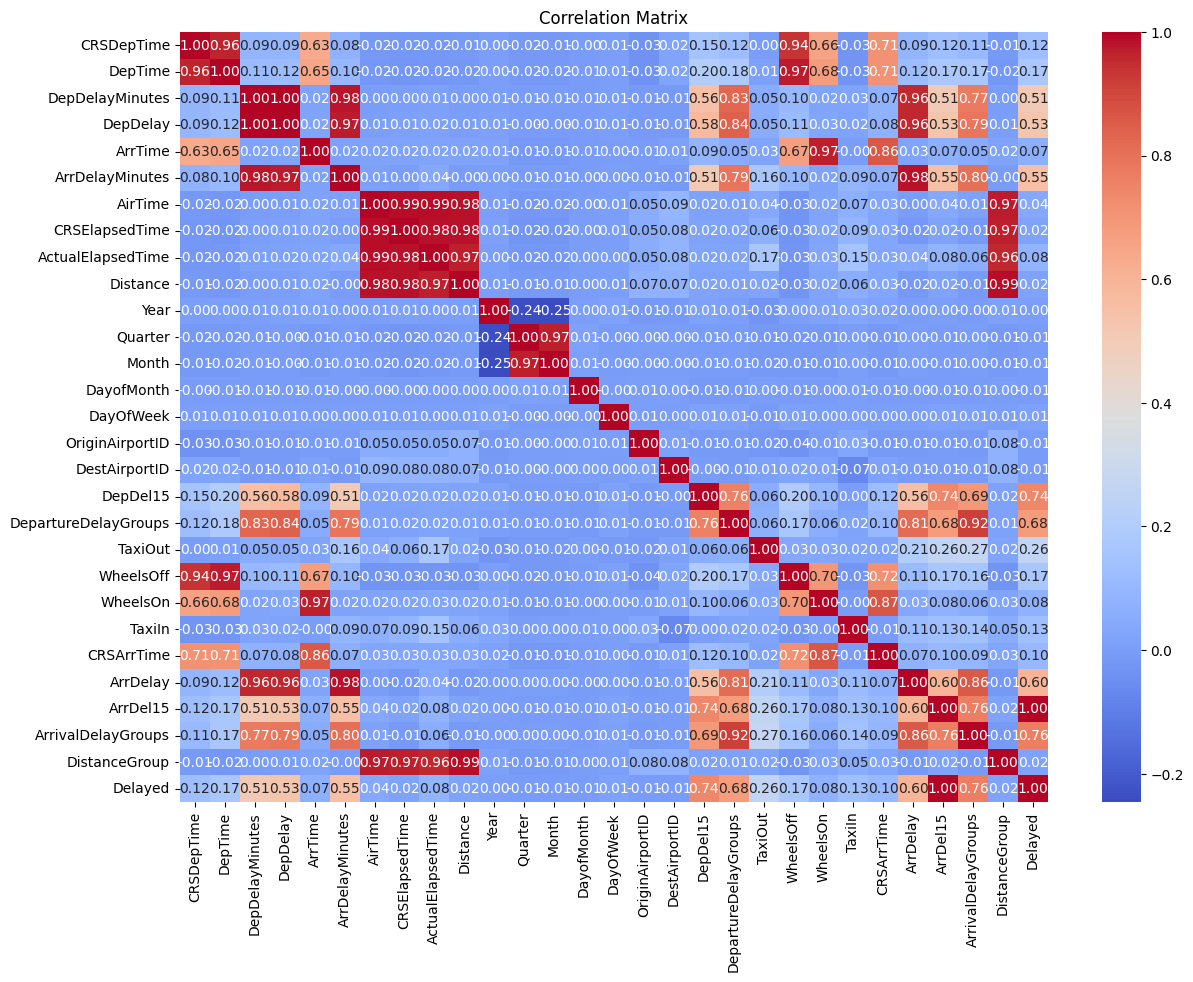

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix on numerical columns
correlation_matrix = df[numerical_cols].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


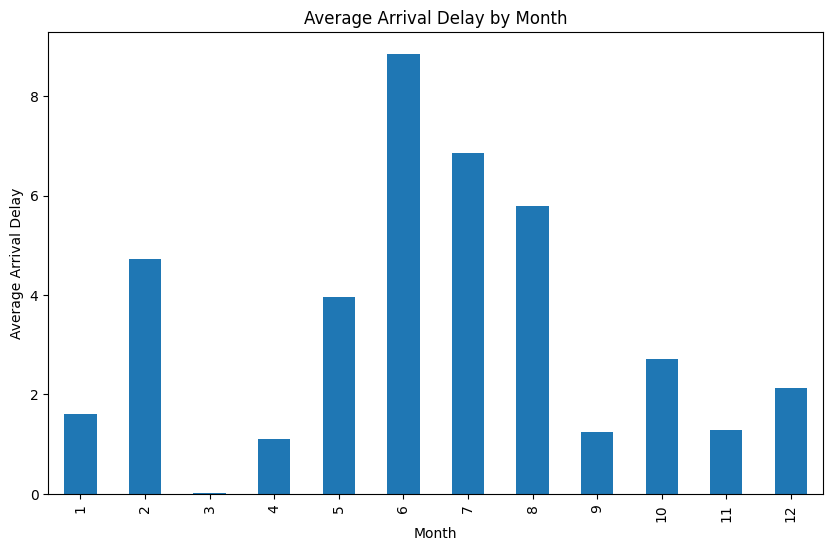

In [17]:
# Average delay per month
df['Month'] = df['FlightDate'].dt.month
monthly_avg_delay = df.groupby('Month')['ArrDelay'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_delay.plot(kind='bar')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay')
plt.show()

In [24]:
# One-hot encode the 'Airline', 'Origin', and 'Dest' columns in place
df = pd.get_dummies(df, columns=[ 'Origin', 'Dest'], drop_first=True)

# Display the first few rows to check the encoding
print(df.head())


  FlightDate  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0 2018-03-24      False     False        1900   1855.0              0.0   
1 2018-04-23      False     False        2055   2111.0             16.0   
2 2018-02-16      False     False        1650   1728.0             38.0   
3 2018-12-07      False     False        1845   1851.0              6.0   
4 2018-06-03      False     False        1200   1201.0              1.0   

   DepDelay  ArrTime  ArrDelayMinutes  AirTime  ...  Dest_VEL  Dest_VLD  \
0      -5.0   1927.0              0.0     19.0  ...     False     False   
1      16.0   2316.0             27.0     80.0  ...     False     False   
2      38.0   1903.0             43.0     75.0  ...     False     False   
3       6.0   2214.0              0.0    127.0  ...     False     False   
4       1.0   1639.0              0.0    149.0  ...     False     False   

   Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  Dest_XWA  Dest_YAK Dest_YKM  \
0     False     False   

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Check correlation with the target variable
print(correlation_matrix['ArrDelay'].sort_values(ascending=False))

ValueError: could not convert string to float: 'HA'